In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.metrics import r2_score
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
os.chdir("C:\\Users\\Sandeep\\Practice\\Linear_regression\\src")
import modelfit_v1 as mdl 
pd.set_option('display.max_rows',None)
from IPython.display import display

C:\Users\Sandeep\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
target = 'SalePrice'

In [3]:
data = pd.read_csv("C:\\Users\\Sandeep\\Practice\\Linear_regression\\output_2.csv")


In [4]:
var_trans = [var for var in data.columns if '_' in var]

In [5]:
data[var_trans].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LotFrontage__T      1460 non-null   float64
 1   LotArea__T          1460 non-null   float64
 2   OverallQual__T      1460 non-null   float64
 3   YearBuilt__T        1460 non-null   float64
 4   YearRemodAdd__T     1460 non-null   float64
 5   MasVnrArea__T       1460 non-null   float64
 6   BsmtFinSF1__T       1460 non-null   float64
 7   TotalBsmtSF__T      1460 non-null   float64
 8   1stFlrSF__T         1460 non-null   float64
 9   2ndFlrSF__T         1460 non-null   float64
 10  GrLivArea__T        1460 non-null   float64
 11  FullBath_0          1460 non-null   int64  
 12  FullBath_2          1460 non-null   int64  
 13  FullBath_3          1460 non-null   int64  
 14  HalfBath_0          1460 non-null   int64  
 15  HalfBath_2          1460 non-null   int64  
 16  TotRms

                     0                 1                    2           3
0               Model:               OLS      Adj. R-squared:       0.863
1  Dependent Variable:         SalePrice                 AIC:  34249.2265
2                Date:  2025-04-14 15:31                 BIC:  34598.1152
3    No. Observations:              1460      Log-Likelihood:     -17059.
4            Df Model:                65         F-statistic:       142.6
5        Df Residuals:              1394  Prob (F-statistic):        0.00
6           R-squared:             0.869               Scale:  8.6336e+08


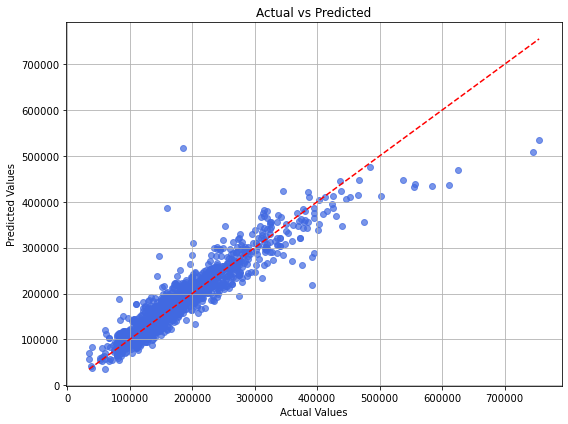

In [6]:
model_perf, summary_df = mdl.modelfit(data,var_trans, target)


In [7]:
summary_df

,Variable,Coefficient,Std.Err.,t,p_value,[0.025,0.975],StdDev,Raw_Impact,Contribution,VIF
0,const,-129069.160233,180325.948672,-0.715755,4.742626e-01,-482808.660986,224670.340519,0.000000e+00,-0.000000,0.000000,1.64
1,LotFrontage__T,0.110975,0.439521,0.252491,8.006989e-01,-0.751218,0.973168,2.241157e+03,248.712205,0.389535,1.83
2,LotArea__T,0.000116,0.000019,6.242308,5.710369e-10,0.000080,0.000152,5.593349e+07,6489.536713,10.163967,3.99
3,OverallQual__T,11896.387248,1122.187057,10.601073,2.629035e-25,9695.029694,14097.744802,1.369444e+00,16291.437598,25.515786,9.21
4,YearBuilt__T,38.352519,84.211518,0.455431,6.488703e-01,-126.842454,203.547493,2.772119e+01,1063.177434,1.665157,2.57
5,YearRemodAdd__T,0.000018,0.000005,3.592369,3.390810e-04,0.000008,0.000028,2.426948e+08,4425.930232,6.931929,2.76
6,MasVnrArea__T,20.858989,7.601584,2.744032,6.146793e-03,5.947212,35.770766,1.679930e+02,3504.164333,5.488252,3.05
7,BsmtFinSF1__T,18.026609,3.129792,5.759682,1.035404e-08,11.886998,24.166220,4.290492e+02,7734.302215,12.113529,6.90
8,TotalBsmtSF__T,21.694511,5.428903,3.996113,6.775754e-05,11.044810,32.344211,3.723352e+02,8077.630541,12.651253,15.23
9,1stFlrSF__T,9.041818,8.251961,1.095718,2.733917e-01,-7.145782,25.229419,3.638027e+02,3289.437944,5.151945,12.45


In [14]:
pd.set_option('display.max_rows',None)
top_var = summary_df[(summary_df['p_value']<=0.05) & (summary_df['Contribution']>=10)& (summary_df['VIF']<=3)]

In [15]:
var_trans_top = top_var['Variable'].to_list()

                     0                 1                    2           3
0               Model:               OLS      Adj. R-squared:       0.815
1  Dependent Variable:         SalePrice                 AIC:  34631.0170
2                Date:  2025-04-14 15:32                 BIC:  34678.5927
3    No. Observations:              1460      Log-Likelihood:     -17307.
4            Df Model:                 8         F-statistic:       806.7
5        Df Residuals:              1451  Prob (F-statistic):        0.00
6           R-squared:             0.816               Scale:  1.1648e+09


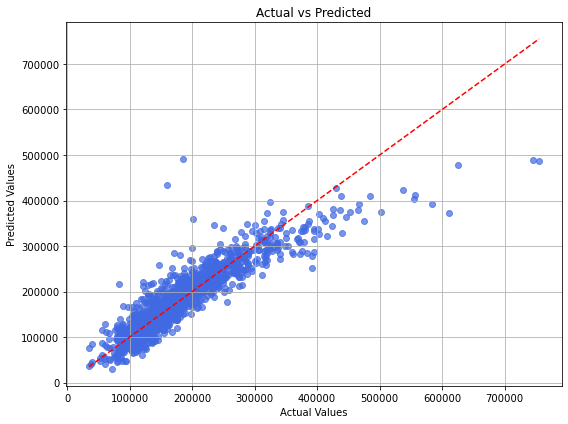

In [16]:
model_perf, summary_df = mdl.modelfit(data,var_trans_top, target)

In [17]:
summary_df

,Variable,Coefficient,Std.Err.,t,p_value,[0.025,0.975],StdDev,Raw_Impact,Contribution,VIF
0,const,-71580.588193,6650.404233,-10.763344,4.789946e-26,-84626.022783,-58535.153603,0.000000e+00,-0.000000,0.000000,1.41
1,LotArea__T,0.000163,0.000019,8.601043,2.015722e-17,0.000126,0.000200,5.593349e+07,9117.836690,10.958497,2.58
2,OverallQual__T,22674.208858,1048.212284,21.631314,3.626868e-90,20618.035383,24730.382334,1.369444e+00,31051.062058,37.319484,1.31
3,BsmtFinSF1__T,29.334687,2.384642,12.301507,3.744214e-33,24.656973,34.012401,4.290492e+02,12586.024049,15.126823,1.93
4,TotalBsmtSF__T,32.362811,3.331345,9.714638,1.173366e-21,25.828044,38.897578,3.723352e+02,12049.814548,14.482367,2.01
5,GrLivArea__T,41.380067,2.555806,16.190610,2.516383e-54,36.366596,46.393537,4.951489e+02,20489.295522,24.625565,1.16
6,FullBath_3,56375.484377,6461.838889,8.724372,7.203421e-18,43699.939613,69051.029142,1.486842e-01,8382.144995,10.074288,1.81
7,ExterQual_TA,-20943.863649,2478.552801,-8.450037,6.982258e-17,-25805.793437,-16081.933861,4.854169e-01,-10166.505717,12.218865,1.33
8,GarageType_Attchd,-624.012072,2098.086891,-0.297420,7.661888e-01,-4739.619837,3491.595693,4.908870e-01,-306.319433,0.368158,NaN


In [18]:
data[var_trans_top].corr().style.background_gradient(cmap='coolwarm')

,LotArea__T,OverallQual__T,BsmtFinSF1__T,TotalBsmtSF__T,GrLivArea__T,FullBath_3,ExterQual_TA,GarageType_Attchd
LotArea__T,1.000000,0.264254,0.217614,0.385413,0.456939,0.170745,-0.127029,0.230652
OverallQual__T,0.264254,1.000000,0.224470,0.537276,0.593196,0.183673,-0.655059,0.357284
BsmtFinSF1__T,0.217614,0.224470,1.000000,0.461677,0.137803,0.029561,-0.122047,0.287390
TotalBsmtSF__T,0.385413,0.537276,0.461677,1.000000,0.419497,0.138027,-0.413538,0.405967
GrLivArea__T,0.456939,0.593196,0.137803,0.419497,1.000000,0.340222,-0.395422,0.144087
FullBath_3,0.170745,0.183673,0.029561,0.138027,0.340222,1.000000,-0.071016,-0.062583
ExterQual_TA,-0.127029,-0.655059,-0.122047,-0.413538,-0.395422,-0.071016,1.000000,-0.281532
GarageType_Attchd,0.230652,0.357284,0.287390,0.405967,0.144087,-0.062583,-0.281532,1.000000
